## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [2]:
df = pd.read_csv('datasets/adult.csv', sep=',')
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


---------------------------------------------------------------------------









## 1-. Calculate the entropy for each feature

### Calcular entropía

$ H(X) = - \sum_x P(x) log_2 P(x) $

In [3]:
def H(X):
    M = len(X)
    values, counts = np.unique(X, return_counts=True)
    PX = counts/M
    h = -np.sum( PX * np.log2(PX) )
    
    ncategories = len(values)
    hmax = -np.log2(1/ncategories)
    
    return h,hmax

In [4]:
for i in df.columns:
    x = H(df[i].values)
    print('-H(' + i + ') =', x[0], '|  Hmax(' + i + ') =',  x[1], '\n\n')

-H(age) = 5.683324396400329 |  Hmax(age) = 6.189824558880018 


-H(workclass) = 1.647976927509927 |  Hmax(workclass) = 3.1699250014423126 


-H(education) = 2.9313508978037115 |  Hmax(education) = 4.0 


-H(education-num) = 2.9313508978037115 |  Hmax(education-num) = 4.0 


-H(marital-status) = 1.8336493538835446 |  Hmax(marital-status) = 2.807354922057604 


-H(occupation) = 3.516903064343104 |  Hmax(occupation) = 3.9068905956085187 


-H(relationship) = 2.1544237955049743 |  Hmax(relationship) = 2.584962500721156 


-H(race) = 0.7987406510139586 |  Hmax(race) = 2.321928094887362 


-H(sex) = 0.9157360598501509 |  Hmax(sex) = 1.0 


-H(hours-per-week) = 3.4795648800680166 |  Hmax(hours-per-week) = 6.554588851677638 


-H(native-country) = 0.9437954138017222 |  Hmax(native-country) = 5.392317422778761 


-H(income) = 0.7963839552022132 |  Hmax(income) = 1.0 




---------------------------------------------------------------------------









## 2-. Graph the mutual information matrix
### Tarda un minuto en imprimir la tabla. Ser paciente.
$ IM(X,Y) = \sum_x \sum_y P(x,y) log_2 \frac{ P(x,y) }{ P(x)P(y) } $

In [5]:
def individualIM(nombre1,nombre2,X,Y):
    x_values, x_counts = np.unique(X, return_counts=True)
    y_values, y_counts = np.unique(Y, return_counts=True)
    
    nfeatures = len(x_values) * len(y_values) 
    m = 7 # frecuency, prob(X,Y), prob(X), prob(Y), prob(X,Y)/prob(X)prob(Y), log(-), prob(x,y)log(-)
    values = np.zeros((nfeatures, m))
    index = ['frecuency', 'prob(X,Y)', 'prob(X)', 'prob(Y)', 'prob(X,Y)/prob(X)prob(Y)', 'log(-)', 'prob(x,y)log(-)']
    
    i = 0
    totalPXY = 0
    namesCombination = []
    for var1 in x_values:
        for var2 in y_values:
            # Combination name
            cadena = str(var1)+'-'+str(var2)
            namesCombination.append(cadena)
            
            # Frecuency
            idx1 = df[nombre1].values == var1
            idx2 = df[nombre2].values == var2
            c = np.sum( np.logical_and(idx1, idx2) )
            totalPXY = totalPXY + c
            values[i,0] = c
            
            i = i+1
            
    i = 0
    for var1 in x_values:
        for var2 in y_values:
            # prob(X,Y)
            values[i,1] = values[i,0]/totalPXY
            
            # prob(X)
            values[i,2] = np.sum(df[nombre1].values == var1) / len(df[nombre1].values)
            
            # prob(Y)
            values[i,3] = np.sum(df[nombre2].values == var2) / len(df[nombre2].values)
            
            # prob(X,Y)/prob(X)prob(Y)
            values[i,4] = values[i,1] / (values[i,2]*values[i,3])
            
            # log(-)
            if values[i,4] != 0:
                values[i,5] = np.log2(values[i,4])
            else:
                values[i,5] = 0
            
            # prob(x,y)log(-)
            values[i,6] = values[i,1]*values[i,5]
            
            
            i = i+1
            
    dfs = pd.DataFrame(values, columns=index, index=namesCombination)
    IMresult = sum(dfs['prob(x,y)log(-)'].values)
    
    return dfs, IMresult
    

In [6]:
def IMTable():    
    m = 12
    values = np.zeros((m, m))
    
    i = 0
    for x in df.columns:
        j = 0
        for y in df.columns:
#             if x != y:
#             print(x,y)
            tabla, IMresult = individualIM(x,y, df[x], df[y])
            values[i,j] = IMresult
#             print(i,j)
            j = j+1
        i=i+1
        
    dfs = pd.DataFrame(values, columns=df.columns, index=df.columns)
    return dfs
                
tablaIM = IMTable()
tablaIM

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
age,5.683324,0.089621,0.166403,0.166403,0.355410,0.125678,0.289065,0.009931,0.012833,0.250289,0.057332,0.099218
workclass,0.089621,1.647977,0.047141,0.047141,0.031334,0.471202,0.035284,0.010107,0.018833,0.089113,0.013488,0.021572
education,0.166403,0.047141,2.931351,2.931351,0.034507,0.322677,0.054353,0.014904,0.006852,0.084368,0.077934,0.093591
education-num,0.166403,0.047141,2.931351,2.931351,0.034507,0.322677,0.054353,0.014904,0.006852,0.084368,0.077934,0.093591
marital-status,0.355410,0.031334,0.034507,0.034507,1.833649,0.077623,1.046677,0.018547,0.163419,0.077928,0.017175,0.156528
occupation,0.125678,0.471202,0.322677,0.322677,0.077623,3.516903,0.121359,0.018315,0.143273,0.179617,0.042093,0.092922
relationship,0.289065,0.035284,0.054353,0.054353,1.046677,0.121359,2.154424,0.024373,0.394068,0.112325,0.018312,0.165366
race,0.009931,0.010107,0.014904,0.014904,0.018547,0.018315,0.024373,0.798741,0.009555,0.020489,0.141463,0.008378
sex,0.012833,0.018833,0.006852,0.006852,0.163419,0.143273,0.394068,0.009555,0.915736,0.057676,0.003351,0.037171
hours-per-week,0.250289,0.089113,0.084368,0.084368,0.077928,0.179617,0.112325,0.020489,0.057676,3.479565,0.043542,0.061002


---------------------------------------------------------------------------









## 3-. Graph a countplot or a rectangle plot for each feature

#### 3.1-. Age

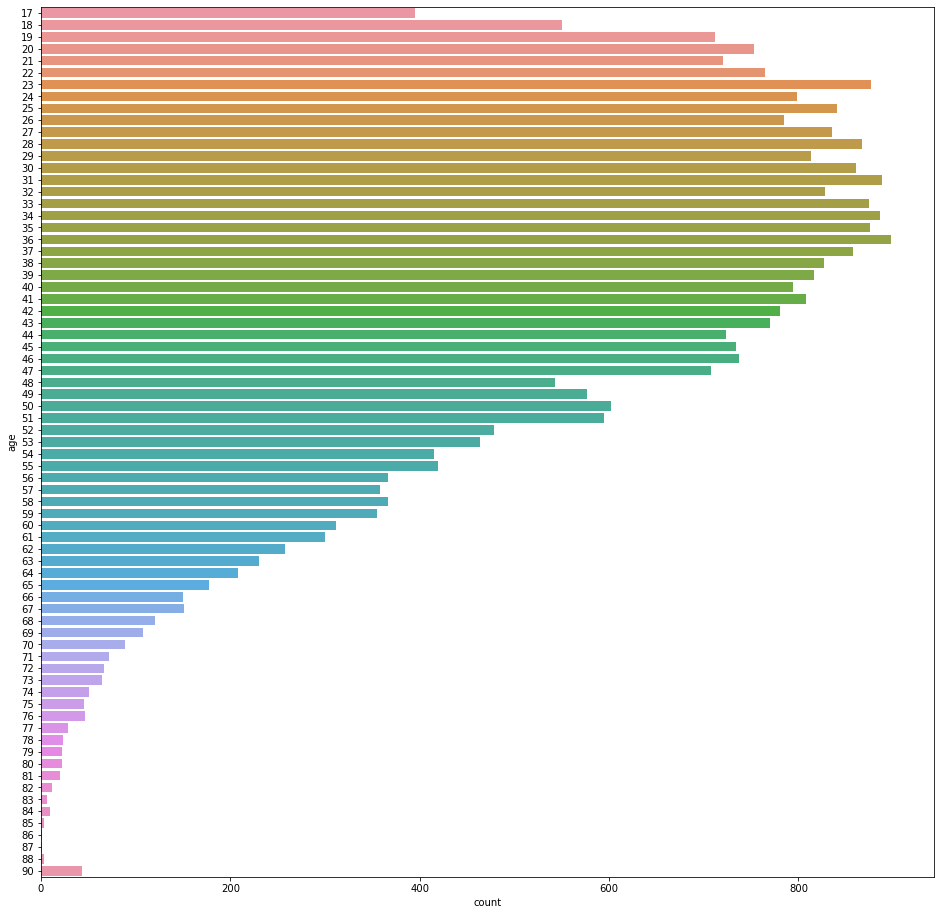

In [7]:
plt.figure(figsize = (16,16))
sns.countplot(data=df, y=df['age'])

#### 3.2-. Workclass

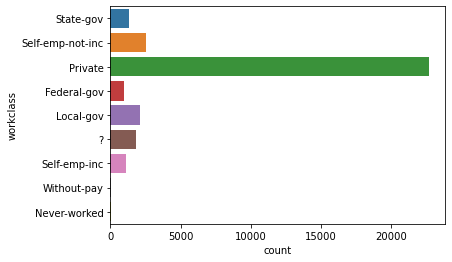

In [8]:
sns.countplot(data=df, y=df['workclass'])

#### 3.3-. Education

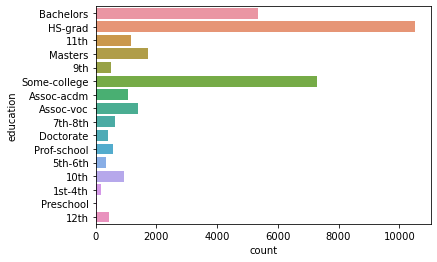

In [9]:
sns.countplot(data=df, y=df['education'])

#### 3.4-. Education-num

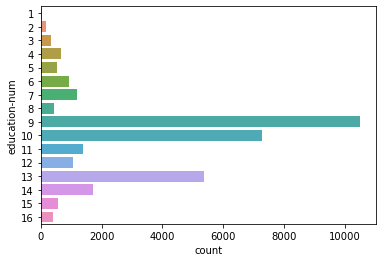

In [10]:
sns.countplot(data=df, y=df['education-num'])

#### 3.5-. Maritial-status

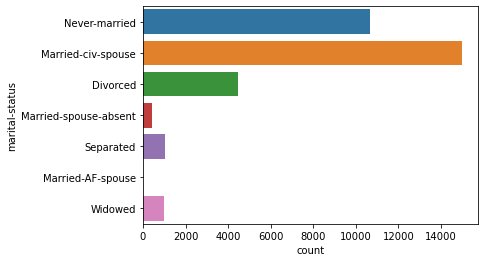

In [11]:
sns.countplot(data=df, y=df['marital-status'])

#### 3.6-. Occupation

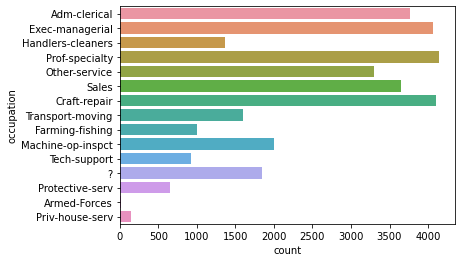

In [12]:
sns.countplot(data=df, y=df['occupation'])

#### 3.7-. Relationship

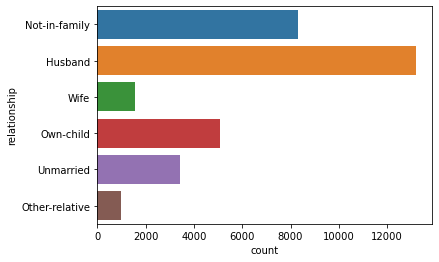

In [13]:
sns.countplot(data=df, y=df['relationship'])

#### 3.8-. Race

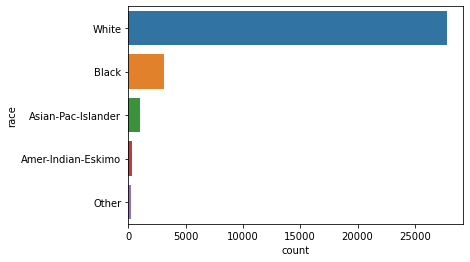

In [14]:
sns.countplot(data=df, y=df['race'])

#### 3.9-. Sex

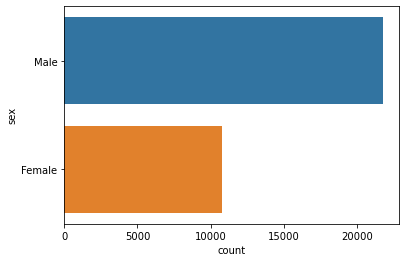

In [15]:
sns.countplot(data=df, y=df['sex'])

#### 3.10-. Hours-per-week

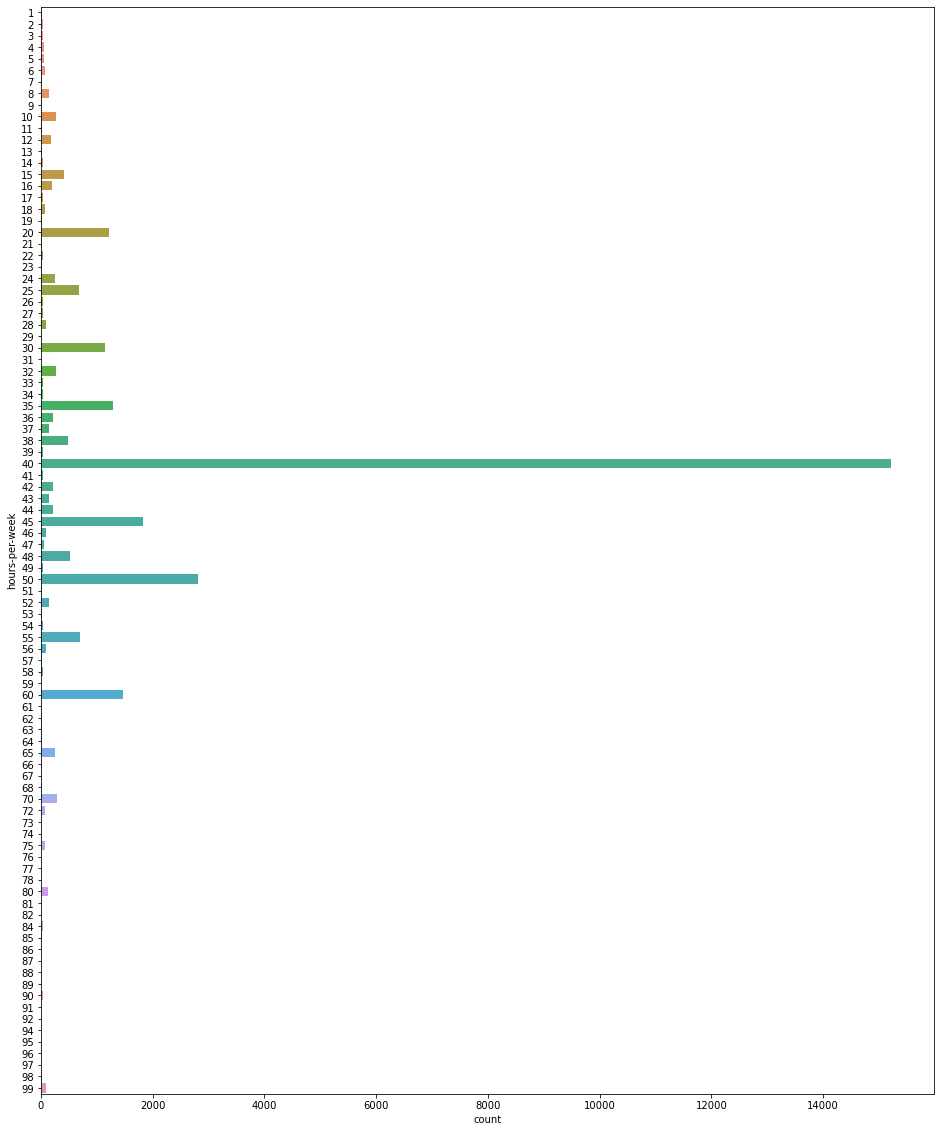

In [16]:
plt.figure(figsize = (16,20))
sns.countplot(data=df, y=df['hours-per-week'])

#### 3.11-. Native-country

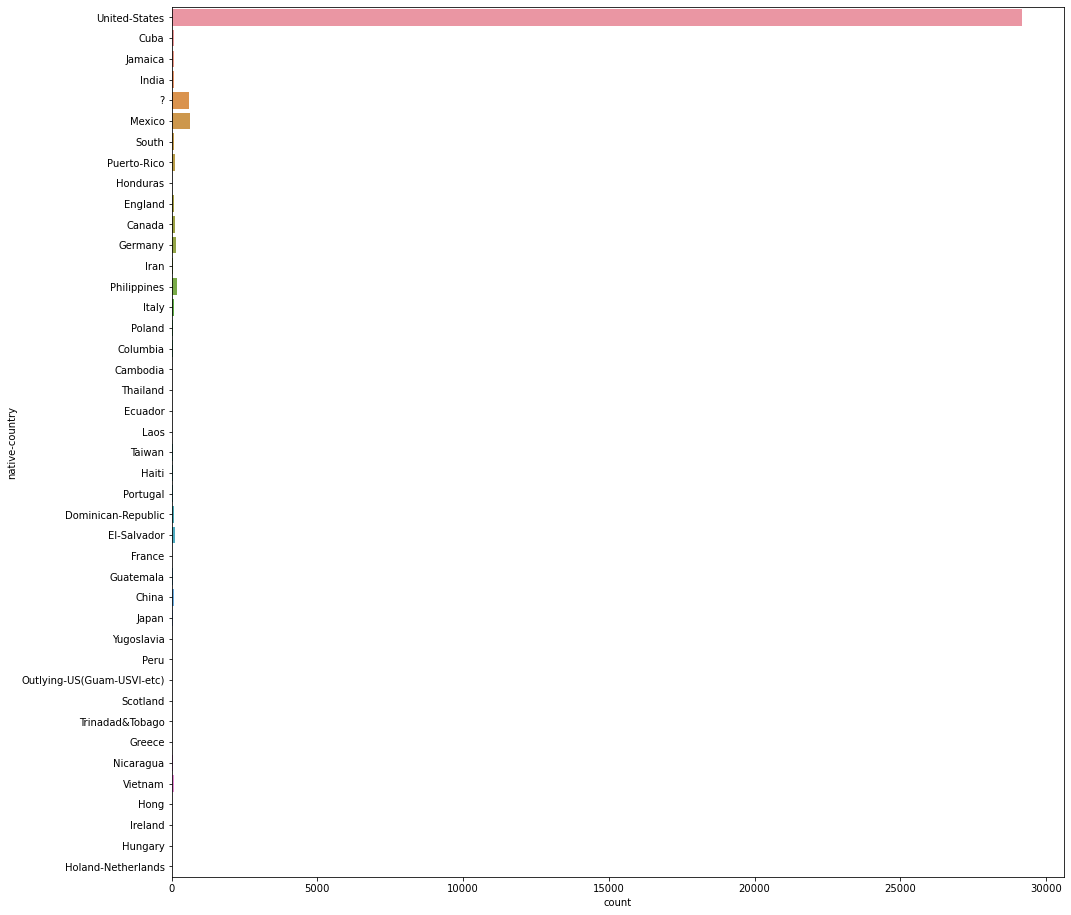

In [17]:
plt.figure(figsize = (16,16))
sns.countplot(data=df, y=df['native-country'])

#### 3.12-. Income

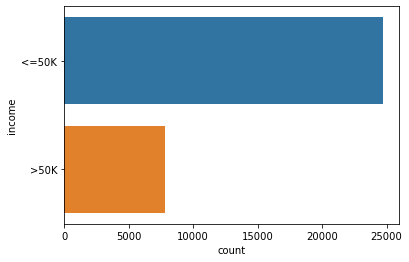

In [18]:
sns.countplot(data=df, y=df['income'])

---------------------------------------------------------------------------









## 4-. Generate a visualization to compare two features, for example, sex and education

### Se comparan los grados de educación con la cantidad de ingresos de cada uno.

<Figure size 432x288 with 0 Axes>

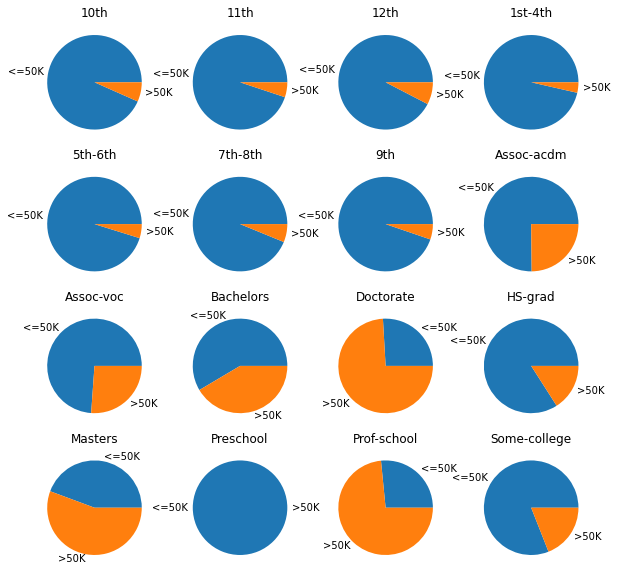

In [19]:
idx1 = df['income'].values == '<=50K'
idx2 = df['income'].values == '>50K'

plt.figure()

i = 0

plt.figure(figsize=(10, 10))
for x in np.unique(df['education'].values):
    i = i+1
    plt.subplot(4,4,i)
    plt.title(x)

    idxm = df['education'].values == x
    c1 = np.sum( np.logical_and(idx1, idxm) )
    c2 = np.sum( np.logical_and(idx2, idxm) )
    plt.pie([c1,c2], labels=['<=50K', '>50K'])

---------------------------------------------------------------------------









## 5-. Write at least two insights from the data (justifying with metrics or graphs). Insights consist of some interesting facts that you discover from the Exploratory Data Analysis.

### 5.1-. Edad-Ingresos

#### Existe una rango de edad donde el porcentaje de tener ingresos mayores a 50K incrementa, que es desde los 37 años hasta los 60 años (aproximadamente), se podría decir que este es el auge o donde más se gana.

#### Las personas más jóvenes 17-29 años tienen menor probabilidad de obtener un sueldo mayor a los 50K, ganan menos o igual a 50K. Y mientras más edad se tenga después de los 60 años, la probabilidad de obtener un sueldo mayor a 50K disminuye. Cabe mencionar que esto último no se puede confirmar al 100%, ya que existen pocos datos de personas mayores a los 60 años en comparación con las otras edades, tal vez con más datos esto pueda cambiar o mantenerse.

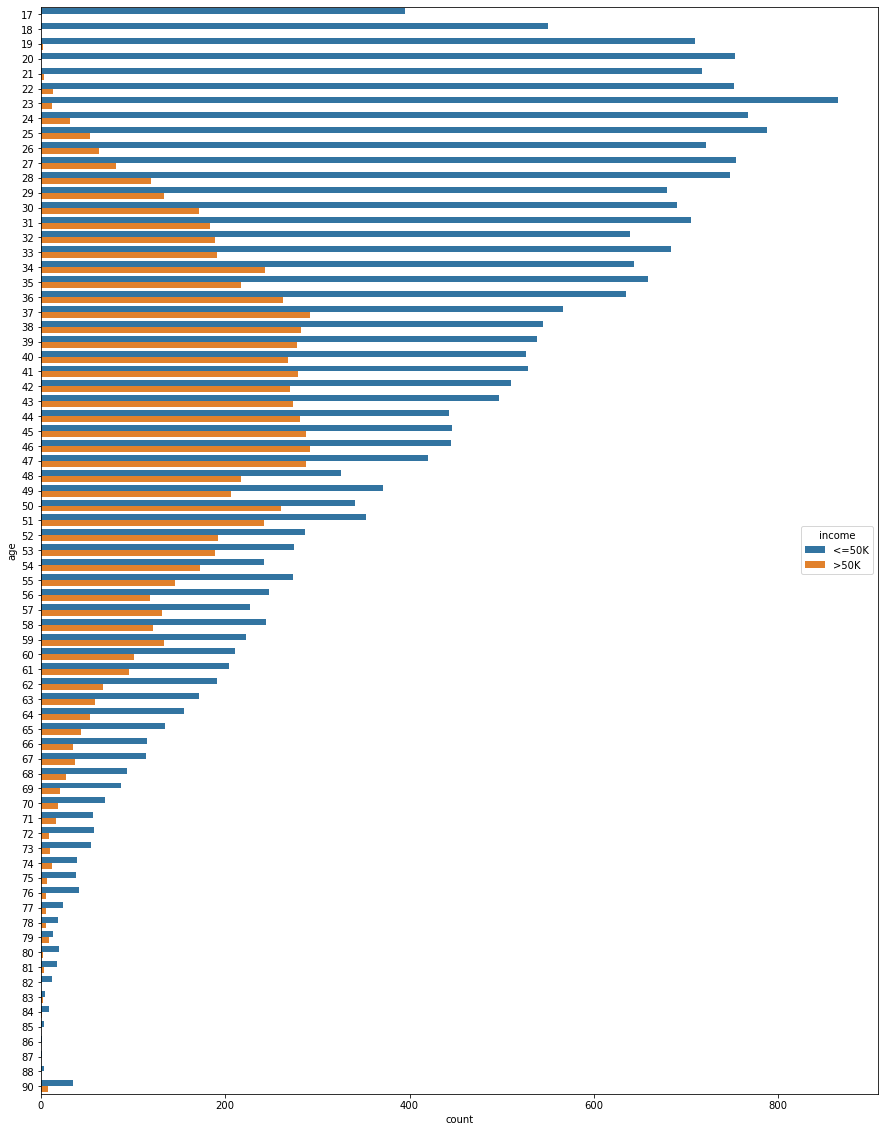

In [20]:
plt.figure(figsize=(15, 20))
sns.countplot(data=df, y='age', hue='income')

### 5.2-. Horas de trabajo a la semana-Ingresos

#### La mayor parte de las personas trabajan 40 horas semanalmente; digamos que si se trabaja sólo entre semana (5 días), cada día serían 8 horas; esto podemos decir que es el promedio de horas que una persona trabaja normalmente. De estas 40 horas, 4/5 partes de las personas, aproximadamente (79%), ganan menos o igual a 50K. 

#### Al parecer, aunque no hay tanta información como lo que respalda a los que trabajan 40 horas, se podría decir que las personas que trabajan menos de 40 horas tienen más probabilidad de obtener ingresos menores o iguales a 50K, como las personas que trabajan 20 horas (94%) y, por el contrario, los que trabajan más de 40 horas, como es el caso de los que trabajan 50 horas, tienen mayor probabilidad de obtener unos ingresos mayores a 50K (45%).

Probabilidad de obtener menos o igual a 50K trabajando 20 horas semanales: 0.9362745098039216
Probabilidad de obtener menos o igual a 50K trabajando 40 horas semanales: 0.7866202273772754
Probabilidad de obtener menos o igual a 50K trabajando 50 horas semanales: 0.5473572188719404
Probabilidad de más de 50K trabajando 50 horas semanales: 0.4526427811280596


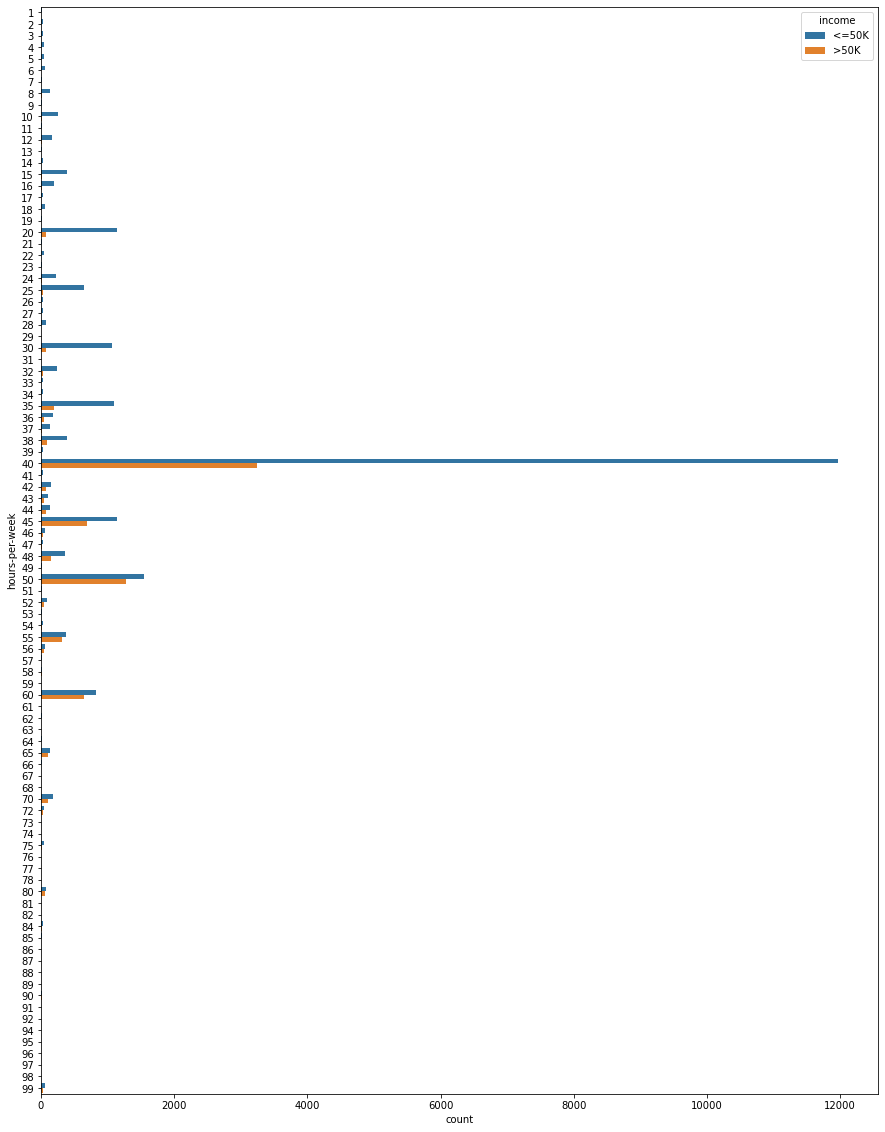

In [21]:
plt.figure(figsize=(15, 20))
sns.countplot(data=df, y='hours-per-week', hue='income')

# Personas que trabajan 20 horas
idx1 = df['hours-per-week'].values == 20
idx2 = df['income'].values == '<=50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['hours-per-week'].values == 20)
print('Probabilidad de obtener menos o igual a 50K trabajando 20 horas semanales:', prob)

# Personas que trabajan 40 horas
idx1 = df['hours-per-week'].values == 40
idx2 = df['income'].values == '<=50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['hours-per-week'].values == 40)
print('Probabilidad de obtener menos o igual a 50K trabajando 40 horas semanales:', prob)

# Personas que trabajan 50 horas
idx1 = df['hours-per-week'].values == 50
idx2 = df['income'].values == '<=50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['hours-per-week'].values == 50)
print('Probabilidad de obtener menos o igual a 50K trabajando 50 horas semanales:', prob)

# Personas que trabajan 50 horas
idx1 = df['hours-per-week'].values == 50
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['hours-per-week'].values == 50)
print('Probabilidad de más de 50K trabajando 50 horas semanales:', prob)

### 5.3-. Nivel de educación-Ingresos

#### En este countplot de education-income, podemos observar que aquellas personas con más estudios tienen una mayor probabilidad de obtener ingresos mayores a 50K. En el caso de las personas con alguna licenciatura, este porcentaje es de un 41% (aproximadamente). Las personas con maestría tienen más de 50% de probabilidades de obtener un sueldo mayor a 50K, y aquellas personas con algún doctorado o son profesores de universidad, tienen un 74% y un 73% respectivamente (aproximadamente) de ingresar más de 50K.

#### Por lo tanto, a mayor nivel de estudios, mayor la probabilidad de obtener ingresos mayores a 50K, y mientras menor sea el nivel de estudios, mayor es la probabilidad de obtener ingresos menores o iguales a 50K.

Probabilidad de obtener más de 50K teniendo una licenciatura: 0.4147525676937442
Probabilidad de obtener más de 50K teniendo una maestría: 0.5565873476494486
Probabilidad de obtener más de 50K teniendo un doctorado: 0.7409200968523002
Probabilidad de obtener más de 50K siendo profesor de universidad: 0.734375


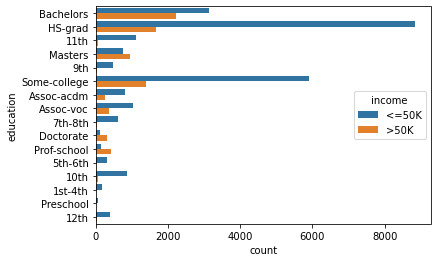

In [23]:
sns.countplot(data=df, y='education', hue='income')

# Maestría
idx1 = df['education'].values == 'Bachelors'
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['education'].values == 'Bachelors')
print('Probabilidad de obtener más de 50K teniendo una licenciatura:', prob)

# Maestría
idx1 = df['education'].values == 'Masters'
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['education'].values == 'Masters')
print('Probabilidad de obtener más de 50K teniendo una maestría:', prob)

# Doctorado
idx1 = df['education'].values == 'Doctorate'
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['education'].values == 'Doctorate')
print('Probabilidad de obtener más de 50K teniendo un doctorado:', prob)

# Profesor de Universidad
idx1 = df['education'].values == 'Prof-school'
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['education'].values == 'Prof-school')
print('Probabilidad de obtener más de 50K siendo profesor de universidad:', prob)

### 5.4-. Sexo-Ingresos

#### Por lo visto, los hombres tienen 3 veces mayor probabilidad de ganar más de 50K que las mujeres (30% contra un 11% de las mujeres).

Probabilidad de obtener más de 50K siendo hombre: 0.3057365764111978
Probabilidad de obtener más de 50K siendo mujer: 0.10946058861758426


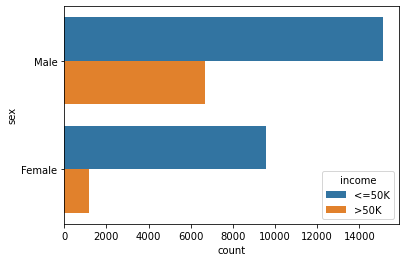

In [25]:
# plt.figure(figsize=(15, 30))
sns.countplot(data=df, y='sex', hue='income')

# Hombres
idx1 = df['sex'].values == 'Male'
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['sex'].values == 'Male')
print('Probabilidad de obtener más de 50K siendo hombre:', prob)

# Mujeres
idx1 = df['sex'].values == 'Female'
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['sex'].values == 'Female')
print('Probabilidad de obtener más de 50K siendo mujer:', prob)

### 5.5-. Estado civil-Ingresos

#### Las personas casadas civilmente tienen un 45% de obtener ingresos mayores a 50K, mucho más arriba que los demás estados civiles.

Probabilidad de obtener más de 50K estando casado por el civil: 0.4468482905982906


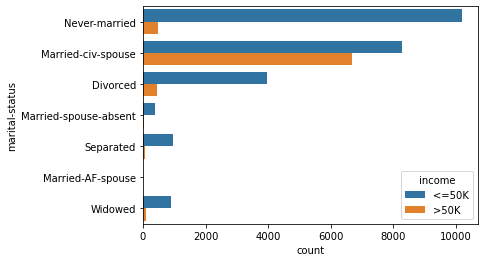

In [26]:
sns.countplot(data=df, y='marital-status', hue='income')

# Casados civilmente
idx1 = df['marital-status'].values == 'Married-civ-spouse'
idx2 = df['income'].values == '>50K'
c = np.sum( np.logical_and(idx1, idx2) )
prob = c / np.sum(df['marital-status'].values == 'Married-civ-spouse')
print('Probabilidad de obtener más de 50K estando casado por el civil:', prob)

### 5.6-. Horas de trabajo a la semana-Sexo

#### Al parecer, las mujeres suelen trabajar menos de 40 horas a la semana en comparación de los hombres. Por el contrario, los hombres son más propensos a trabajar más o igual a 40 horas a la semana en comparación de las mujeres. 

#### Como se vio anteriormente en la parte 5.4, se ve reflejado que esa menor cantidad de ingresos de las mujeres se ve afectado por la cantidad de horas que trabajan a la semana. Aunque esto se debe tomar con pinzas, ya que la mayor parte de los que brindaron información son hombres (66%), esto afecta en la interpretación de los datos, ya que la participación femenina se ve disminuida. Puede que los datos cambien mucho si el porcentaje de encuestados es de 50% hombres y 50% mujeres, o tal vez no cambie, pero sí nos brindaría un panorama más justo para analizar.

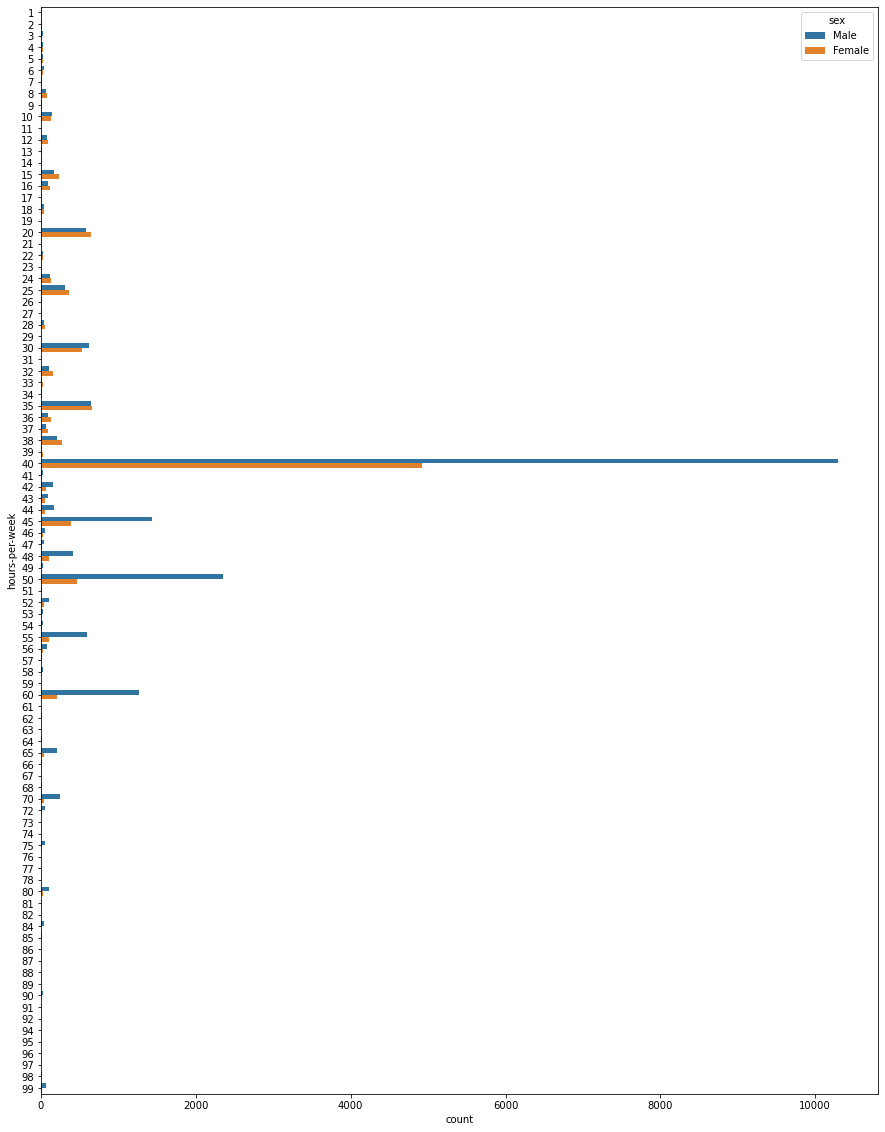

In [27]:
plt.figure(figsize=(15, 20))
sns.countplot(data=df, y='hours-per-week', hue='sex')

Porcentaje de hombres encuestados: 66.92054912318419 %
Porcentaje de mujeres encuestadas: 33.07945087681583 %


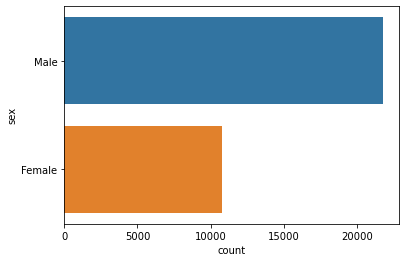

In [28]:
sns.countplot(data=df, y='sex')

# Hombres "encuestadas"
c = len(df['sex'].values)
prob = np.sum(df['sex'].values == 'Male') / c
print('Porcentaje de hombres encuestados:', prob*100, '%')

# Mujeres "encuestadas"
c = len(df['sex'].values)
prob = np.sum(df['sex'].values == 'Female') / c
print('Porcentaje de mujeres encuestadas:', prob*100, '%')